# Introducción a Machine Learning - Regresión Logística con Keras y TensorFlow

## Clasificación de especies de flores Iris según sus medidas (petalos y depalos).

La regresión logística permite predecir categorías a partir de variables numéricas. En este caso, usamos `Iris.csv`  para identificar a qué especie pertenece cada flor (Setosa, Versicolor o Virginica).

## Importaciones de las librerias

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import SGD

## Importar y crear el Dataframe

In [24]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
df.shape

(150, 7)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Convertir a numerico la columna categorica

In [26]:
df['label'] = df['Species'].map({"Iris-setosa": 0,"Iris-versicolor": 1,"Iris-virginica": 2})
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


### Definir Variables:
* `x` = Usamos estas columnas porque son las características que mejor separan las tres especies de flores.
* `y` = Representa la clase a predecir

In [27]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['label']

### Configuración del modelo.

In [28]:
input_dim = 4
output_dim = 3
modelo = Sequential()
modelo.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.001)
modelo.compile(loss="mse", optimizer=sgd)
num_epochs = 300
batch_size = x.shape[0]
modelo.summary()


c:\Users\IPF-2025\Desktop\10-06py\env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento del Modelo

In [8]:
history = modelo.fit(x,y, epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step - loss: 6.9269
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 5.3271
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 4.1012
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 3.1620
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 2.4423
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 1.8909
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 1.4684
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 1.1446
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.8966
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.7065
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.5608
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.4492
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.3637
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.2981
Epoch 15/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.2478
Epoch 16/300


## Grafico

Parametros: w = 0.1, b = 0.0


Text(0.5, 1.0, 'MSE vs. epochs')

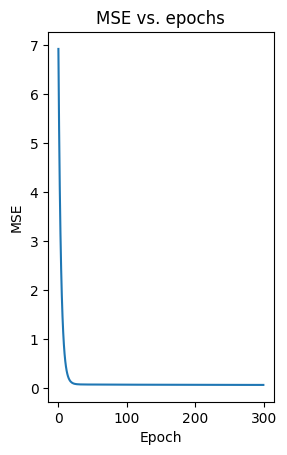

In [45]:
capas = modelo.layers[0]
w, b = capas.get_weights()
print("Parametros: w = {:.1f}, b = {:.1f}".format(w[0][0], b[0]))

plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MSE vs. epochs")


# x_cant = x.values
# y_regr = modelo.predict(x_cant)
# plt.subplot(1,2,2)
# plt.scatter(y, y_regr[:, 0], alpha=0.6)
# plt.plot([0, 2], [0, 2], "r")
# plt.xlabel("Etiqueta real")
# plt.ylabel("Predicción (salida 0)")
# plt.title("Datos originales y regresion lineal")
# plt.show()


### Prediccion

* Ejemplo n°1: Mas probabilidades de satosa

In [48]:

Ejemplo1 = np.array([[5.1, 3.5, 1.4, 0.2]])
result = modelo.predict(Ejemplo1)
print("Predicción:", result[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicción: [ 2.7211094  1.8883389 -1.1856793]


* Ejemplo n2: Mas probabilidades de Versicolor

In [49]:
Ejemplo2 = np.array([[7.2,3.6,6.1,2.5,]])
result = modelo.predict(Ejemplo2)
print("Predicción:", result[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicción: [3.8758643 6.2435794 2.0718164]


In [52]:
result = modelo.predict(Ejemplo1)
clase_predicha = np.argmax(result[0])

if clase_predicha == 0:
    print("Es setosa")
elif clase_predicha == 1:
    print("Es versicolor")
else:
    print("Es virginica")


print(f"Probabilidad de setosa: {result[0][0]:.2f}")
print(f"Probabilidad de versicolor: {result[0][1]:.2f}")
print(f"Probabilidad de virginia: {result[0][2]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Es setosa
Probabilidad de setosa: 2.72
Probabilidad de versicolor: 1.89
Probabilidad de virginia: -1.19
